<a href="https://colab.research.google.com/github/Gpiratelo25/Portif-lio/blob/master/Projeto_Adventure_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files

arquivo = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
df=pd.read_excel('AdventureWorks.xlsx')
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
from google.colab import files

arquivo = files.upload()

Saving Pasta1.xlsx to Pasta1.xlsx


In [ ]:
df2=pd.read_excel('Pasta1.xlsx')
df2.head()

,ID Loja,Nome
0,199,Prestes Maia
1,306,Paes de Barros
2,307,Oscar Freire


In [ ]:
#Juntando as tabelas
dataframe = pd.merge(df,df2,how='inner',on ='ID Loja')

In [ ]:
dataframe.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Nome
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,Prestes Maia
1,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,Prestes Maia
2,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,Prestes Maia
3,2008-05-04,2008-05-15,199,1178,18837,200805044CS605,330.66,998.0,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,Prestes Maia
4,2008-05-06,2008-05-18,199,1178,18838,200805064CS606,330.66,998.0,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,Prestes Maia


In [ ]:
#Definindo Tempo de Preparação
dataframe['tempo de preparação']=dataframe['Data Envio']-dataframe['Data Venda']
#Definindo Custo 
dataframe['Custo']=dataframe['Custo Unitário']*dataframe['Quantidade']
#Definindo lucro
dataframe['lucro']=dataframe['Valor Venda']-dataframe['Custo']
dataframe.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Nome,tempo de preparação,lucro,Custo,Custo Venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,349,758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,Prestes Maia,20 days,2457,2091,2091
1,2009-05-02,2009-05-14,199,384,18938,200905023CS847,349,758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,Prestes Maia,12 days,2457,2091,2091
2,2009-06-28,2009-07-11,199,384,18959,200906283CS870,349,758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,Prestes Maia,13 days,2457,2091,2091
3,2008-05-04,2008-05-15,199,1178,18837,200805044CS605,331,998,6,0,5988,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,Prestes Maia,11 days,4004,1984,1984
4,2008-05-06,2008-05-18,199,1178,18838,200805064CS606,331,998,6,0,5988,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,Prestes Maia,12 days,4004,1984,1984


In [ ]:
dataframe['Data Venda']=pd.to_datetime(dataframe['Data Venda'])

In [ ]:
dataframe.dtypes

Data Venda              datetime64[ns]
Data Envio              datetime64[ns]
ID Loja                          int64
ID Produto                       int64
ID Cliente                       int64
No. Venda                       object
Custo Unitário                 float64
Preço Unitário                 float64
Quantidade                       int64
Valor Desconto                 float64
Valor Venda                    float64
Produto                         object
Fabricante                      object
Marca                           object
Classe                          object
Cor                             object
Nome                            object
tempo de preparação    timedelta64[ns]
lucro                          float64
Custo                          float64
Custo Venda                    float64
dtype: object

In [ ]:
#Verificando nulos
dataframe.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Nome              0
dtype: int64

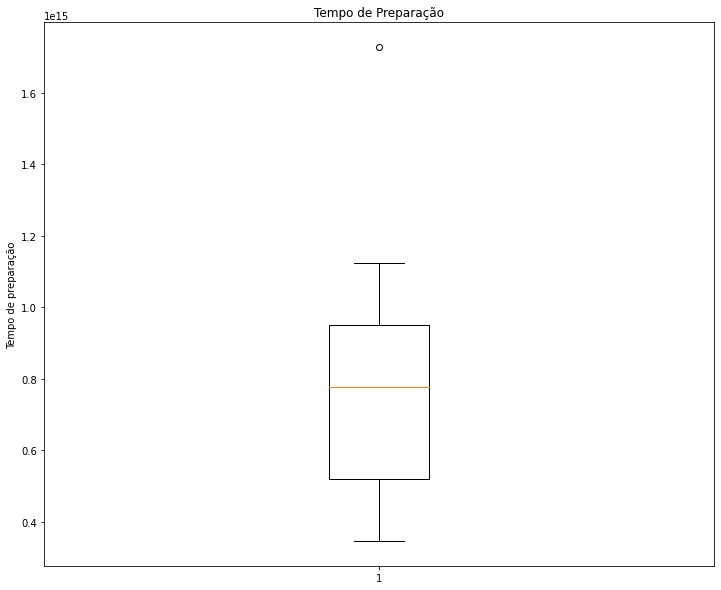

In [ ]:
#Encontrando desvios do tempo de preparação
plt.figure(figsize=(12, 10))
plt.boxplot(dataframe['tempo de preparação'])
plt.ylabel('Tempo de preparação')
plt.title('Tempo de Preparação');


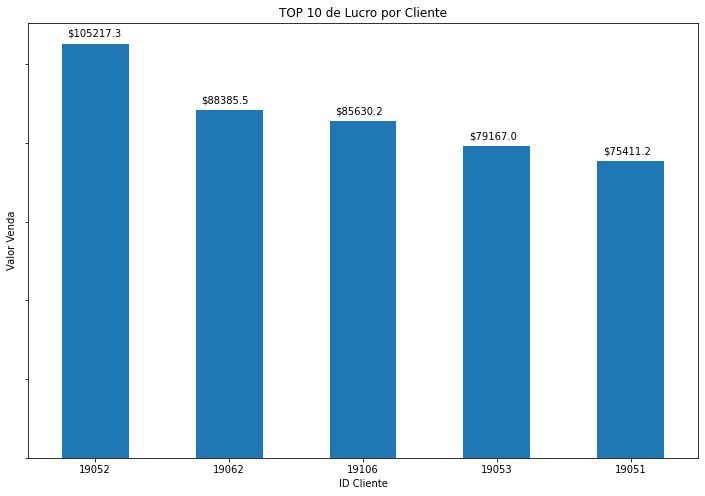

In [ ]:
plt.figure(figsize=(12, 8))
ax=dataframe.groupby(['ID Cliente'])['lucro'].sum().sort_values(ascending=False).head(5).plot.bar(title ='Valor de venda por ID Cliente')
ax.set_xlabel('ID Cliente')
ax.set_ylabel('Valor Venda')
ax.set_yticklabels([])
plt.xticks(rotation="horizontal")
plt.title('TOP 10 de Lucro por Cliente')


#definindo os rótulos


for rect in ax.patches:
    y_value=rect.get_height()
    x_value=rect.get_x()+rect.get_width()/2
    va='bottom'
    label='${:.1f}'.format(y_value)
    plt.annotate(label,(x_value,y_value),xytext=(-28,10),textcoords='offset points',va='center')





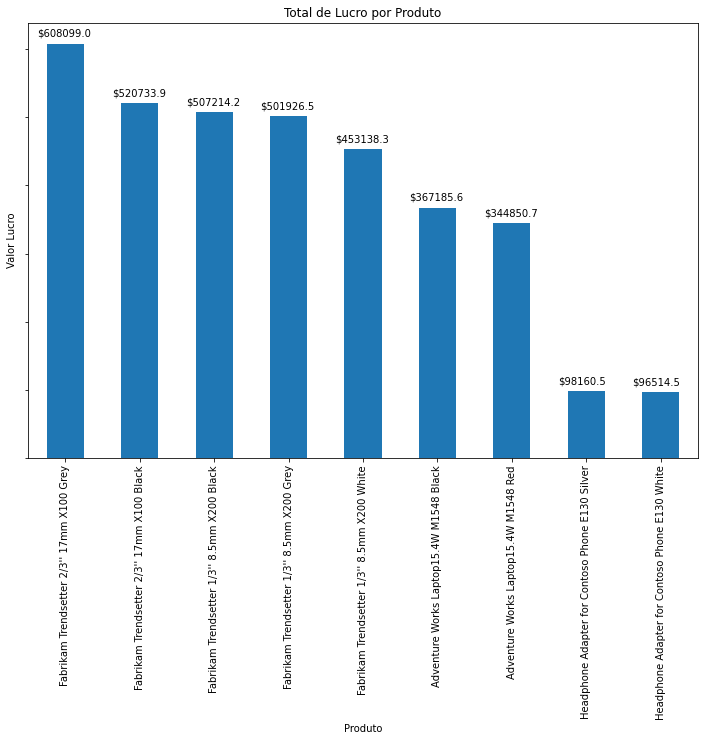

In [ ]:
plt.figure(figsize=(12, 8))
ax=dataframe.groupby('Produto')['lucro'].sum().sort_values(ascending=False).plot.bar()
ax.set_yticklabels([])
ax.set_ylabel('Valor Lucro')
plt.title('Total de Lucro por Produto')

#
for rect in ax.patches:
    y_value=rect.get_height()
    x_value=rect.get_x()+rect.get_width()/2
    va='bottom'
    label='${:.1f}'.format(y_value)
    plt.annotate(label,(x_value,y_value),xytext=(-28,10),textcoords='offset points',va='center')

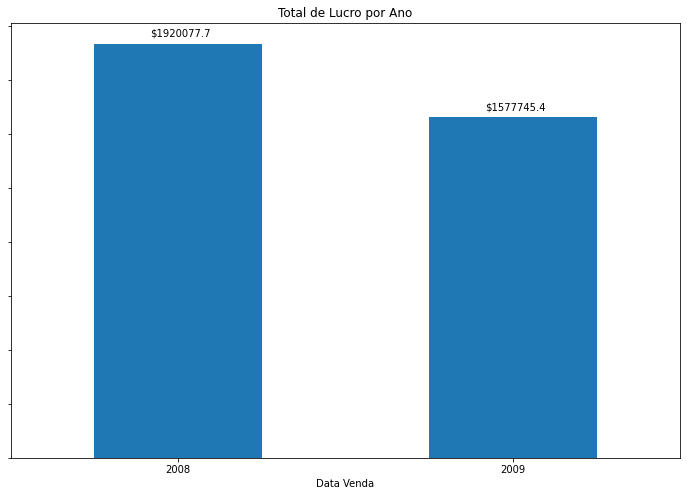

In [ ]:

plt.figure(figsize=(12, 8))
ax=dataframe.groupby(dataframe['Data Venda'].dt.year)['lucro'].sum().plot.bar()
ax.set_yticklabels([])
plt.xticks(rotation="horizontal")
plt.title('Total de Lucro por Ano')


for rect in ax.patches:
    y_value=rect.get_height()
    x_value=rect.get_x()+rect.get_width()/2
    va='bottom'
    label='${:.1f}'.format(y_value)
    plt.annotate(label,(x_value,y_value),xytext=(-28,10),textcoords='offset points',va='center')


In [ ]:
df_2009=df[df['Data Venda'].dt.year==2009]
df_2008=df[df['Data Venda'].dt.year==2008]

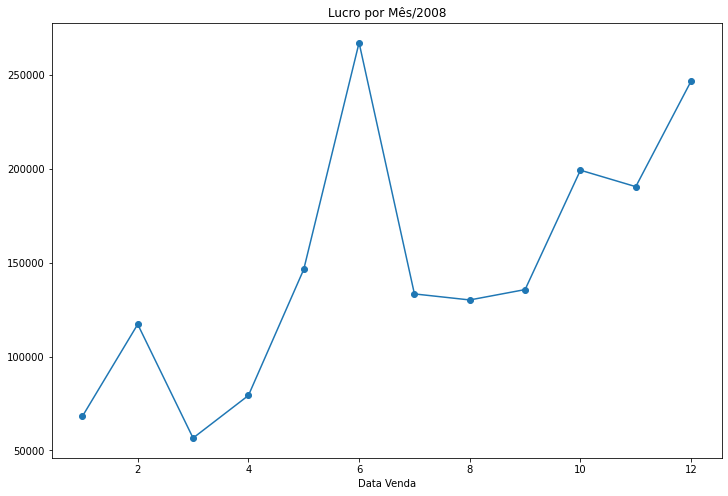

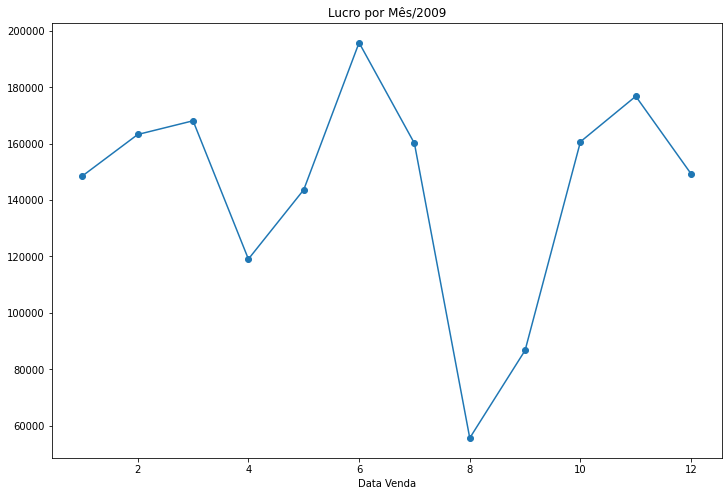

In [ ]:
#Evolução Lucro 
plt.figure(figsize=(12, 8))

ax=dataframe.groupby(df_2008['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro por Mês/2008',marker='o')

plt.figure(figsize=(12, 8))

ax=dataframe.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro por Mês/2009',marker='o')